# CS 109a Final Project - EDA
## Group 50

## 0. Import libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('whitegrid')

## 1. Load data

In [100]:
# Load data - the data is pre-processed
data = pd.read_csv('models2.csv')

# Create a binary variable for maritial status
data['PTMARRY'] = np.where(data['PTMARRY']=='Married','Married','Unmarried')

# Split data into training and test set - All the EDA are performed on the training set
np.random.seed(9001)
msk = np.random.rand(len(data)) < 0.75
data_train = data[msk]
data_test = data[~msk]

### Outcome: reversion back to cognitively normal among MCI patients over 2 years 


In [101]:
print ("Probability of reversion in the training set is %f "%(data_train['MCI_reversion_2y'].mean()))

Probability of reversion in the training set is 0.069686 


## 2. Perform EDA to select potential predictors

### a. Demographics Characteristics 

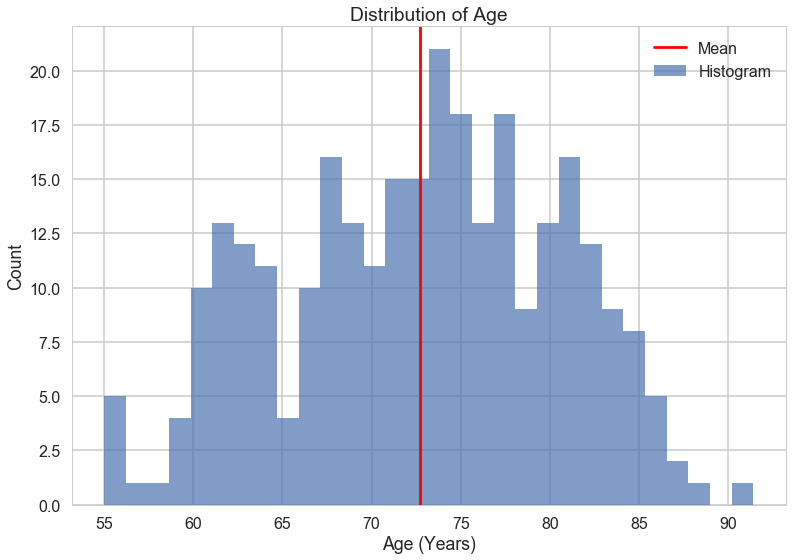

In [102]:
# Distribution of age
plt.hist(data_train['AGE'], alpha=0.7, bins=30, label='Histogram')
plt.title('Distribution of Age')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.axvline(data_train.AGE.mean(), 0, 1.0, color='red', label='Mean')
plt.legend();

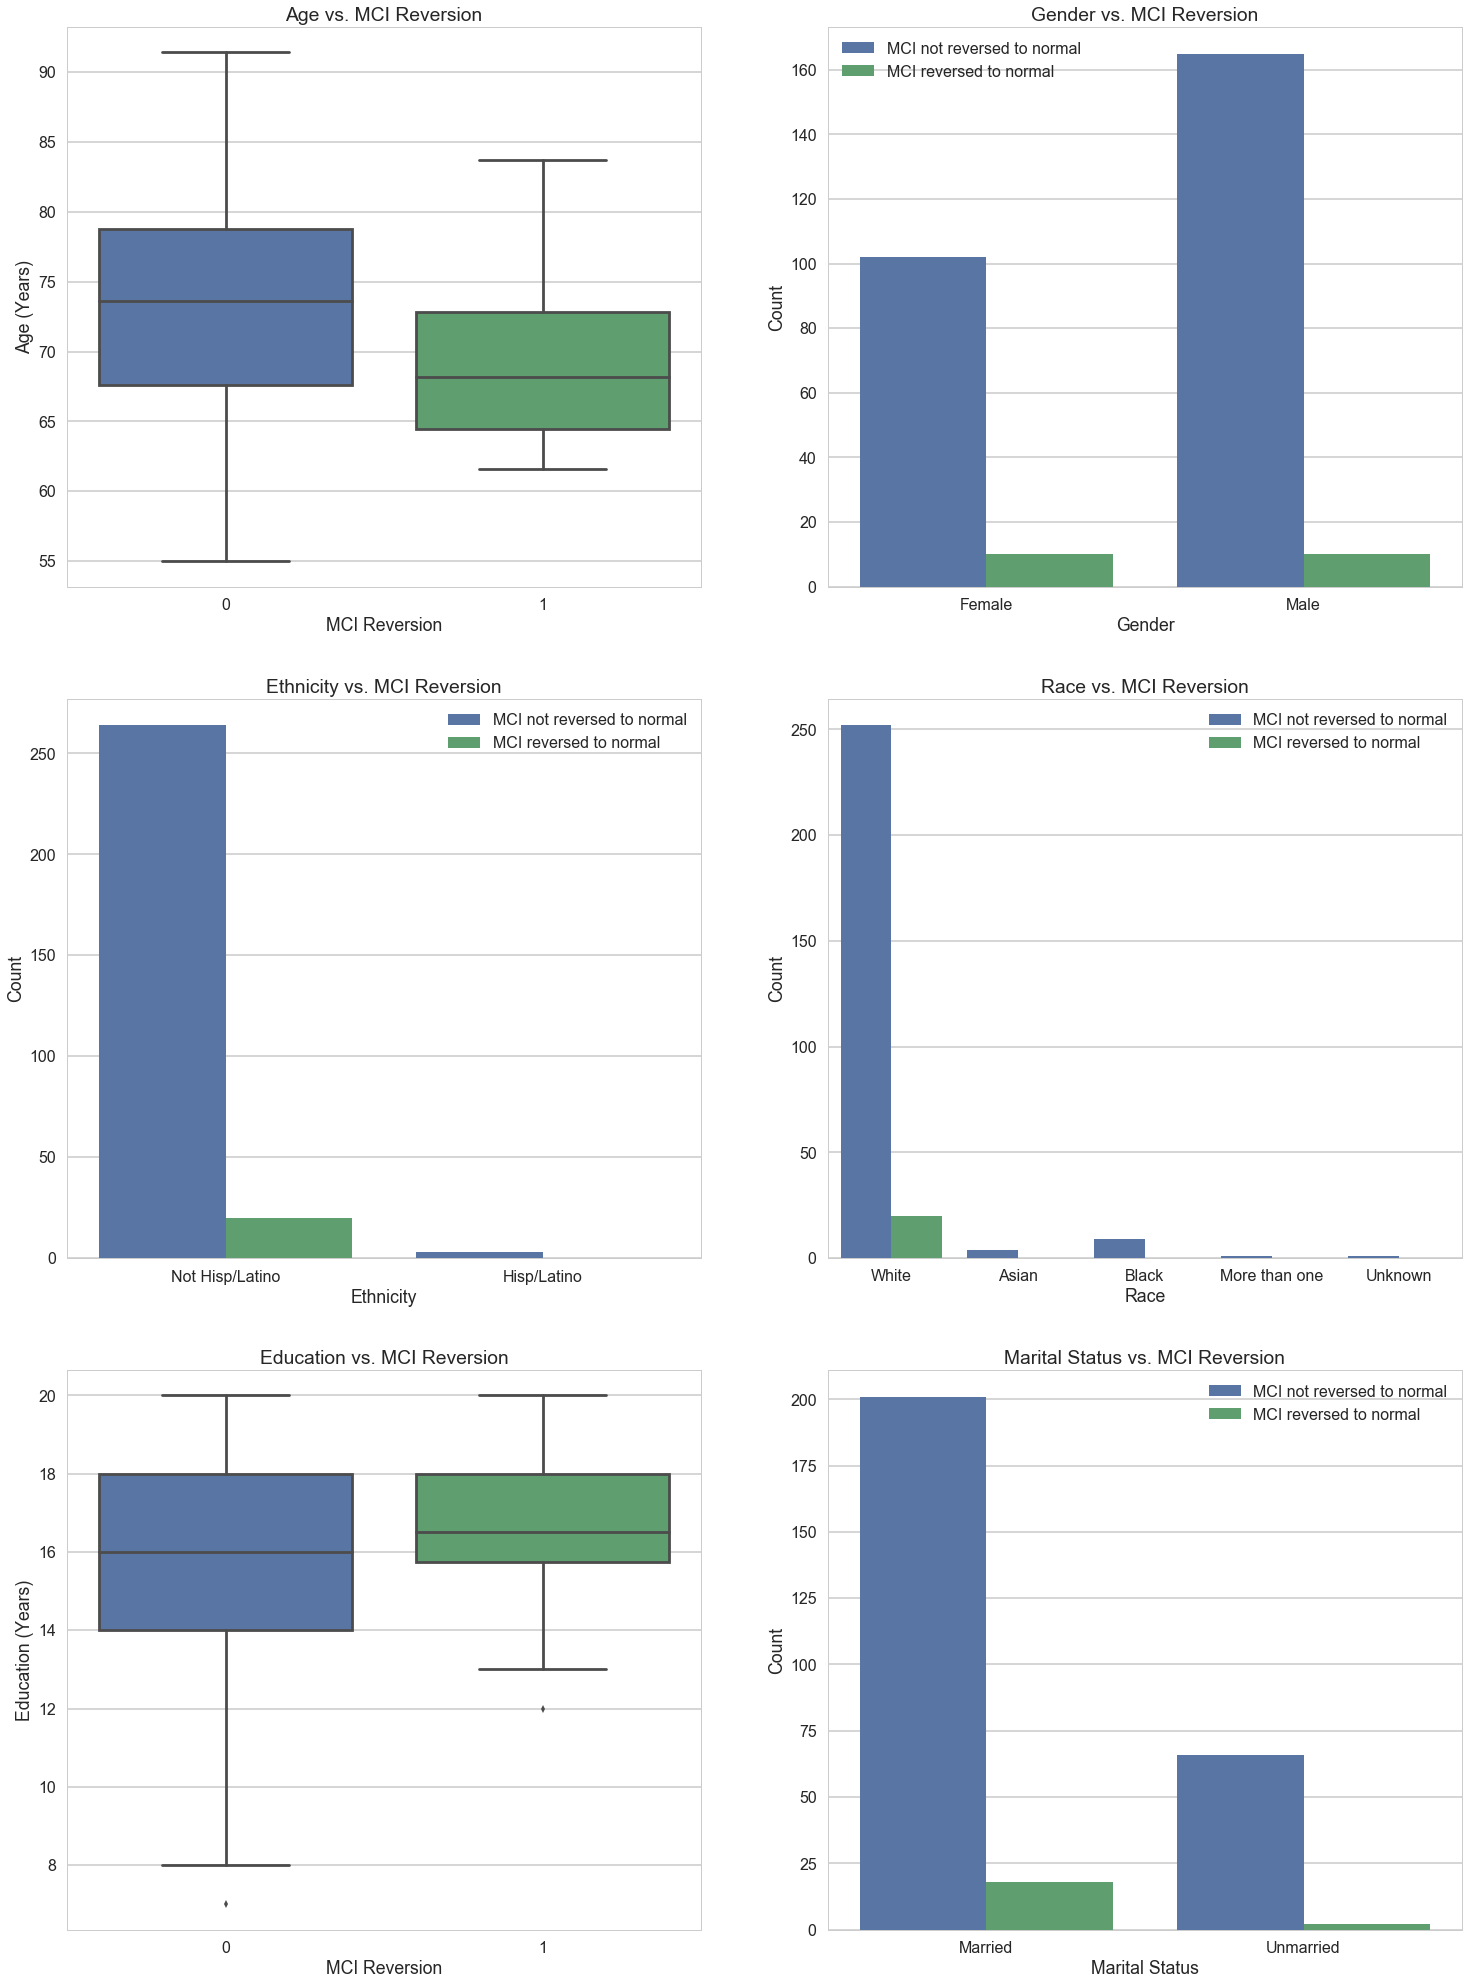

In [103]:
plt.figure(figsize=(25,35))

# Age vs. MCI Reversion
plt.subplot(3,2,1)
data_age = data_train[['AGE','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='AGE', data=data_age)
plt.title('Age vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Age (Years)')

# Gender vs. MCI Reversion
plt.subplot(3,2,2)
data_gender = data_train[['PTGENDER','MCI_reversion_2y']]
sns.countplot(x='PTGENDER', hue='MCI_reversion_2y', data=data_gender)
plt.title('Gender vs. MCI Reversion')
plt.xlabel('Gender')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])
    
# Ethnicity vs. MCI Reversion
plt.subplot(3,2,3)
data_eth = data_train[['PTETHCAT','MCI_reversion_2y']]
sns.countplot(x='PTETHCAT', hue='MCI_reversion_2y', data=data_eth)
plt.title('Ethnicity vs. MCI Reversion')
plt.xlabel('Ethnicity')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right')

# Race vs. MCI Reversion
plt.subplot(3,2,4)
data_race = data_train[['PTRACCAT','MCI_reversion_2y']]
sns.countplot(x='PTRACCAT', hue='MCI_reversion_2y', data=data_race)
plt.title('Race vs. MCI Reversion')
plt.xlabel('Race')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right')
    
# Education
plt.subplot(3,2,5)
data_edu = data_train[['PTEDUCAT','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='PTEDUCAT', data=data_edu)
plt.title('Education vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Education (Years)')

# Marital Status vs. MCI Reversion
plt.subplot(3,2,6)
data_mar = data_train[['PTMARRY','MCI_reversion_2y']]
sns.countplot(x='PTMARRY', hue="MCI_reversion_2y", data=data_mar)
plt.title('Marital Status vs. MCI Reversion')
plt.xlabel('Marital Status')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right');

- #### Interpretation
    - **Age:** Based on the boxplot, young people are more likely to reverse from MCI. Therefore, we select age as our potential predictor.
    - **Gender:** ~60% subjects in the training set is male and ~40% is female. The number of cases in training set is small, but it appears that the probability of MCI reversing to normal is lower among males as compared to females. Therefore, we select gender as our potential predictor.
    - **Ethnicity:** The majority of people in our training set is 'Non-Hispanic/Latino'. We do not have sufficient power to observe the pattern of MCI reversion across different ethnicity groups.
    - **Race:** Again, the majority of people in our training set is 'White'. We do not have sufficient power to observe the pattern of MCI reversion across different race groups.
    - **Education:** Based on the boxplot, patients with longer education years are more likely to reverse from MCI. We select education as our potential predictor.
    - **Marital Status:** Based on the countplot, married people are more likely to reverse from MCI. We select Martial Status as our potential predictor.

- #### Variable Selection
    - We select **Age**, **Gender**, **Education**, and **Marital Status** as potential predictors.

### b. Clinical Factors

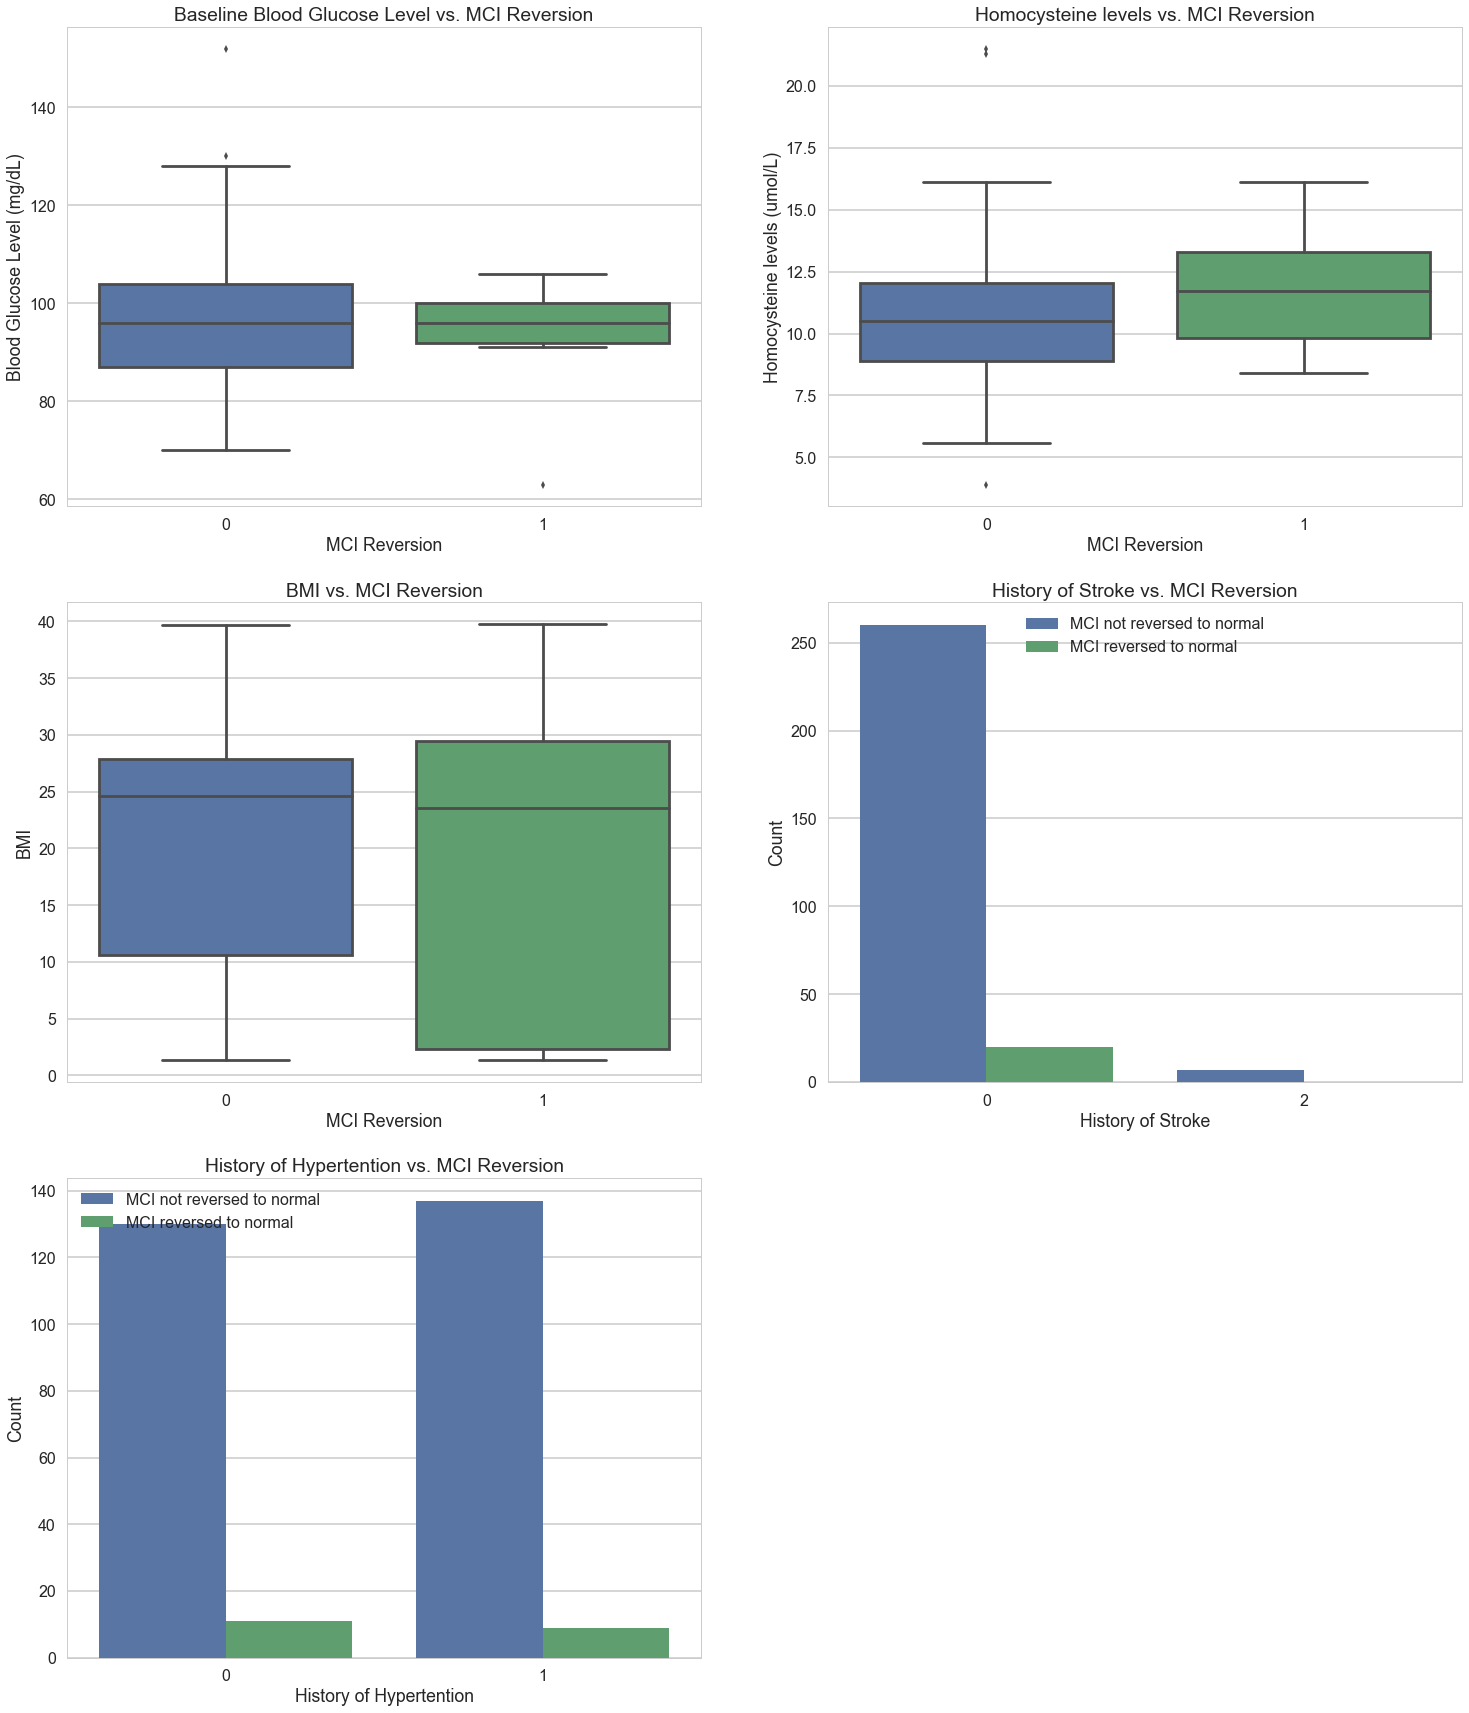

In [111]:
plt.figure(figsize=(25,30))

# Baseline blood glucose level vs. MCI reversion
plt.subplot(3,2,1)
data_glu = data_train[['PMBLGLUC','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='PMBLGLUC', data=data_glu)
plt.title('Baseline Blood Glucose Level vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Blood Glucose Level (mg/dL)')

# Homocysteine level vs. MCI reversion
plt.subplot(3,2,2)
data_hom = data_train[['HCAMPLAS','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='HCAMPLAS', data=data_hom)
plt.title('Homocysteine levels vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Homocysteine levels (umol/L)')

# BMI vs. MCI reversion
plt.subplot(3,2,3)
data_hom = data_train[['BMI','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='BMI', data=data_hom)
plt.title('BMI vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('BMI')
    
# History of Stroke vs. MCI reversion
plt.subplot(3,2,4)
data_dia = data_train[['HMSTROKE','MCI_reversion_2y']]
sns.countplot(x="HMSTROKE", hue="MCI_reversion_2y", data=data_dia)
plt.title('History of Stroke vs. MCI Reversion')
plt.xlabel('History of Stroke')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])

# History of Hypertention vs. MCI reversion
plt.subplot(3,2,5)
data_dia = data_train[['HMHYPERT','MCI_reversion_2y']]
sns.countplot(x="HMHYPERT", hue="MCI_reversion_2y", data=data_dia)
plt.title('History of Hypertention vs. MCI Reversion')
plt.xlabel('History of Hypertention')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper left');

- #### Interpretation
    - **Baseline blood glucose level:** There is no clear association between Baseline blood glucose level and MCI reversion.
    - **Homocysteine level:** Based on the boxplot, people with higher Homocysteine level are more likely to reverse from MCI. We select Homocysteine level as our potential predictor.
    - **BMI:** Based on the boxplot, people with lower BMI are more likely to reverse from MCI. We select BMI as our potential predictor.
    - **History of Stroke:** There is only a few cases in the training set.
    - **History of Hypertention:** There is no clear association between History of Hypertention and MCI reversion.

- #### Variable Selection
    - We select **Homocysteine level** and **BMI** as potential predictors.

### c. Lifestyle factors

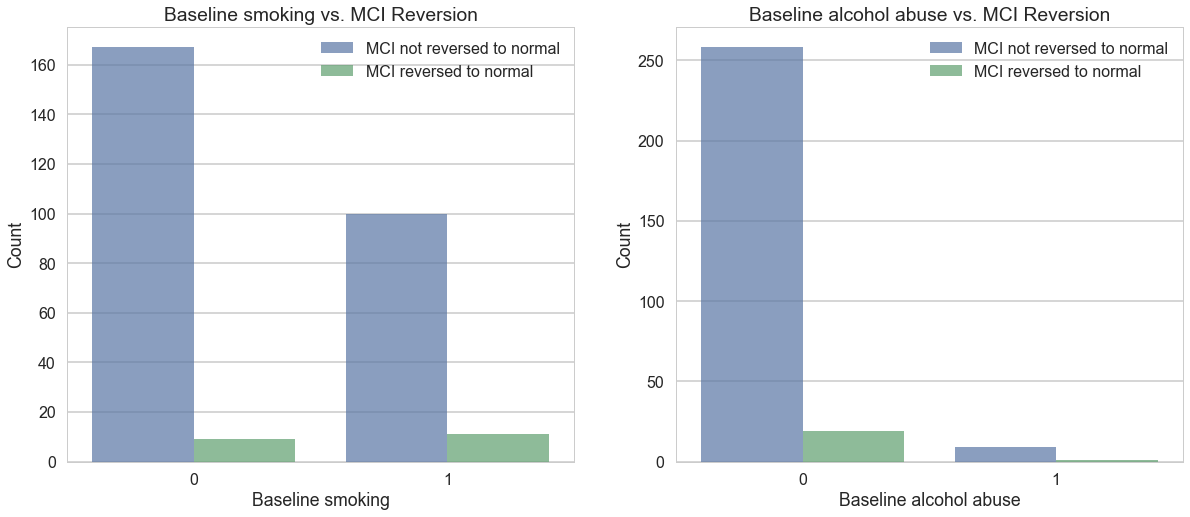

In [124]:
plt.figure(figsize=(20,8))

# Baseline smoking vs. MCI reversion
plt.subplot(121)
data_smo = data_train[['MH16SMOK','MCI_reversion_2y']]
sns.countplot(x='MH16SMOK', hue="MCI_reversion_2y",data=data_smo,alpha=0.7)
plt.title('Baseline smoking vs. MCI Reversion')
plt.xlabel('Baseline smoking')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])

# Baseline alcohol abuse vs. MCI reversion
plt.subplot(122)
data_alc = data_train[['MH14ALCH','MCI_reversion_2y']]
sns.countplot(x='MH14ALCH', hue="MCI_reversion_2y",data=data_alc,alpha=0.7)
plt.title('Baseline alcohol abuse vs. MCI Reversion')
plt.xlabel('Baseline alcohol abuse')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal']);

- #### Interpretation
    - **Baseline smoking:** Based on the countplot, people who smoke are more likely to reverse from MCI. We select Baseline smoking as potential predictors.
    - **Baseline alcohol abuse:** There is only a few cases in the training set.

- #### Variable Selection
    - We select **Baseline smoking** as potential predictor.

### d. Neurocognitive/neuropsychological assessments

#### Histogram

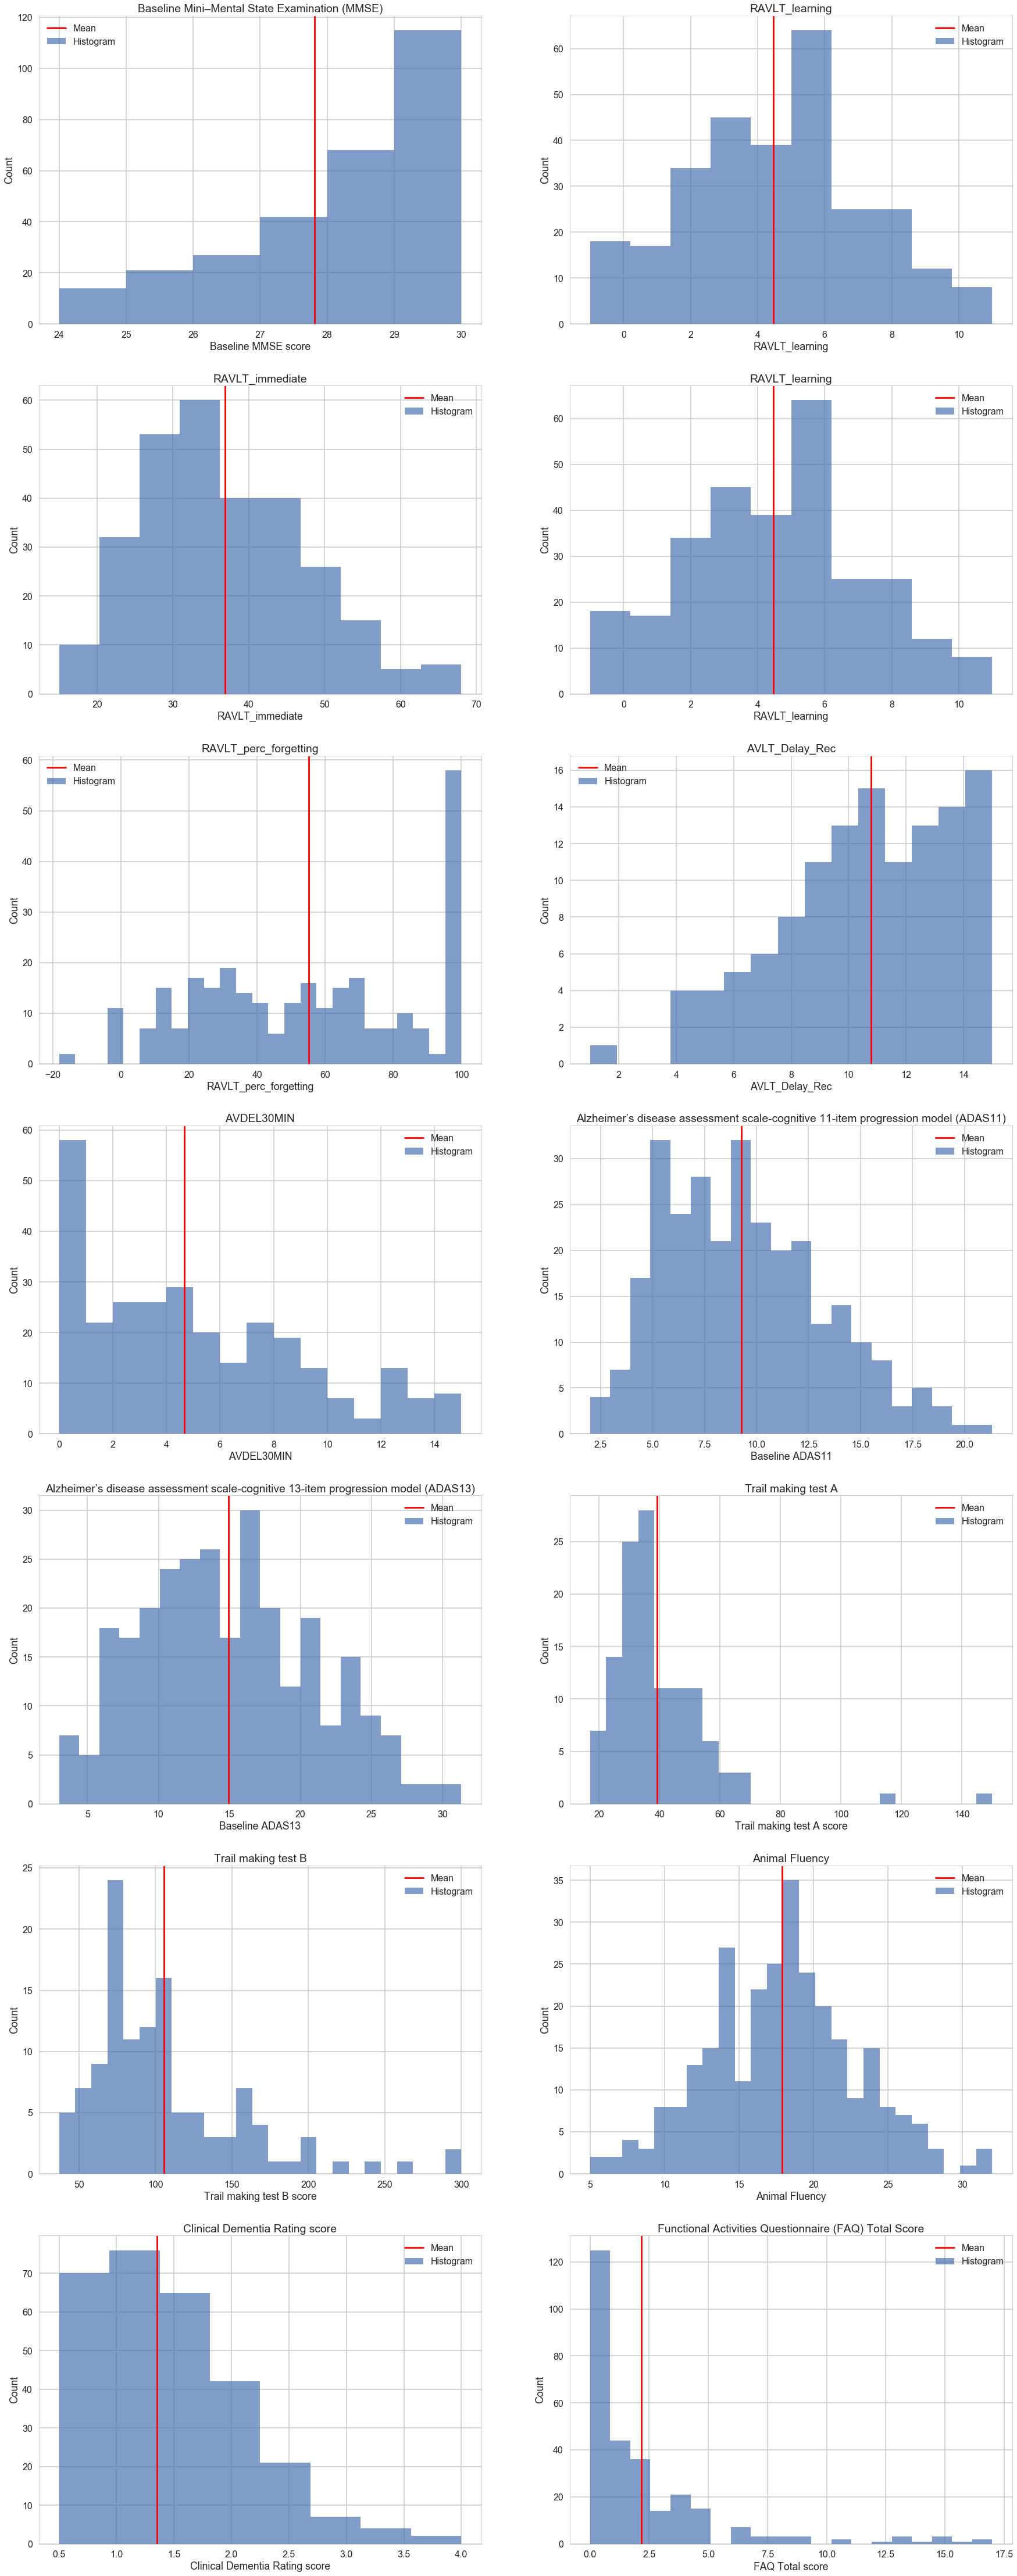

In [136]:
plt.figure(figsize=(30,80))

# Baseline Mini–Mental State Examination
plt.subplot(7,2,1)
plt.hist(x='MMSE', data=data_train,alpha=0.7,bins=6,label='Histogram');
plt.title('Baseline Mini–Mental State Examination (MMSE)')
plt.xlabel('Baseline MMSE score')
plt.ylabel('Count')
plt.axvline(data_train['MMSE'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# RAVLT_learning
plt.subplot(7,2,2)
plt.hist(x='RAVLT_learning', data=data_train,alpha=0.7,bins=10,label='Histogram');
plt.title('RAVLT_learning')
plt.xlabel('RAVLT_learning')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_learning'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# RAVLT_immediate
plt.subplot(7,2,3)
plt.hist(x='RAVLT_immediate', data=data_train,alpha=0.7,bins=10,label='Histogram');
plt.title('RAVLT_immediate')
plt.xlabel('RAVLT_immediate')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_immediate'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# RAVLT_forgetting
plt.subplot(7,2,4)
plt.hist(x='RAVLT_learning', data=data_train,alpha=0.7,bins=10,label='Histogram');
plt.title('RAVLT_learning')
plt.xlabel('RAVLT_learning')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_learning'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# RAVLT_perc_forgetting
plt.subplot(7,2,5)
plt.hist(x='RAVLT_perc_forgetting', data=data_train,alpha=0.7,bins=25,label='Histogram');
plt.title('RAVLT_perc_forgetting')
plt.xlabel('RAVLT_perc_forgetting')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_perc_forgetting'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# AVLT_Delay_Rec
plt.subplot(7,2,6)
plt.hist(x=data_train['AVLT_Delay_Rec'].dropna(),alpha=0.7,bins=15,label='Histogram');
plt.title('AVLT_Delay_Rec')
plt.xlabel('AVLT_Delay_Rec')
plt.ylabel('Count')
plt.axvline(data_train['AVLT_Delay_Rec'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# AVDEL30MIN
plt.subplot(7,2,7)
plt.hist(x=data_train['AVDEL30MIN'].dropna(),alpha=0.7,bins=15,label='Histogram');
plt.title('AVDEL30MIN')
plt.xlabel('AVDEL30MIN')
plt.ylabel('Count')
plt.axvline(data_train['AVDEL30MIN'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# Alzheimer’s disease assessment scale-cognitive 11-item progression model
plt.subplot(7,2,8)
plt.hist(x=data_train['ADAS11'].dropna(),alpha=0.7,bins=20,label='Histogram');
plt.title('Alzheimer’s disease assessment scale-cognitive 11-item progression model (ADAS11)')
plt.xlabel('Baseline ADAS11')
plt.ylabel('Count')
plt.axvline(data_train['ADAS11'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# Alzheimer’s disease assessment scale-cognitive 13-item progression model
plt.subplot(7,2,9)
plt.hist(x=data_train['ADAS13'].dropna(),alpha=0.7,bins=20,label='Histogram');
plt.title('Alzheimer’s disease assessment scale-cognitive 13-item progression model (ADAS13)')
plt.xlabel('Baseline ADAS13')
plt.ylabel('Count')
plt.axvline(data_train['ADAS13'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Trail making test A score
plt.subplot(7,2,10)
plt.hist(x=data_train['TMT_PtA_Complete'].dropna(),alpha=0.7,bins=25,label='Histogram');
plt.title('Trail making test A')
plt.xlabel('Trail making test A score')
plt.ylabel('Count')
plt.axvline(data_train['TMT_PtA_Complete'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Trail making test B score
plt.subplot(7,2,11)
plt.hist(x=data_train['TMT_PtB_Complete'].dropna(),alpha=0.7,bins=25,label='Histogram');
plt.title('Trail making test B')
plt.xlabel('Trail making test B score')
plt.ylabel('Count')
plt.axvline(data_train['TMT_PtB_Complete'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# Animal Fluency
plt.subplot(7,2,12)
plt.hist(x=data_train['CATANIMSC'].dropna(),alpha=0.7,bins=25,label='Histogram');
plt.title('Animal Fluency')
plt.xlabel('Animal Fluency')
plt.ylabel('Count')
plt.axvline(data_train['CATANIMSC'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Clinical Dementia Rating score
plt.subplot(7,2,13)
plt.hist(x=data_train['CDRSB'].dropna(),alpha=0.7,bins=8,label='Histogram');
plt.title('Clinical Dementia Rating score')
plt.xlabel('Clinical Dementia Rating score')
plt.ylabel('Count')
plt.axvline(data_train['CDRSB'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Functional Activities Questionnaire
plt.subplot(7,2,14)
plt.hist(x=data_train['FAQ'].dropna(),alpha=0.7,bins=20,label='Histogram');
plt.title('Functional Activities Questionnaire (FAQ) Total Score')
plt.xlabel('FAQ Total score')
plt.ylabel('Count')
plt.axvline(data_train['FAQ'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend();

- #### Interpretation
<br/>With the exception of Animal Fluency, all other neuropsychological measures appear to have skewed distributions. We may need to normalize or transform these values in the final analyses.

#### Correlation matrix

In [132]:
# Correlations between neuropsychological measures
data_neuro = data_train[['CDRSB','ADAS11','ADAS13','MMSE','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting',
                         'RAVLT_perc_forgetting','AVDEL30MIN','AVLT_Delay_Rec','FAQ','TMT_PtA_Complete','TMT_PtB_Complete',
                         'CATANIMSC']].dropna()

corr = pd.DataFrame(np.corrcoef(data_neuro.T))
corr.columns = ['CDRSB','ADAS11','ADAS13','MMSE','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting',
                         'RAVLT_perc_forgetting','AVDEL30MIN','AVLT_Delay_Rec','FAQ','TMT_PtA_Complete','TMT_PtB_Complete',
                         'CATANIMSC']

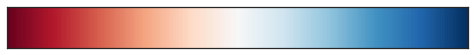

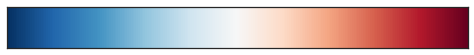

In [133]:
dpal = sns.choose_colorbrewer_palette(data_type='diverging', as_cmap=True)

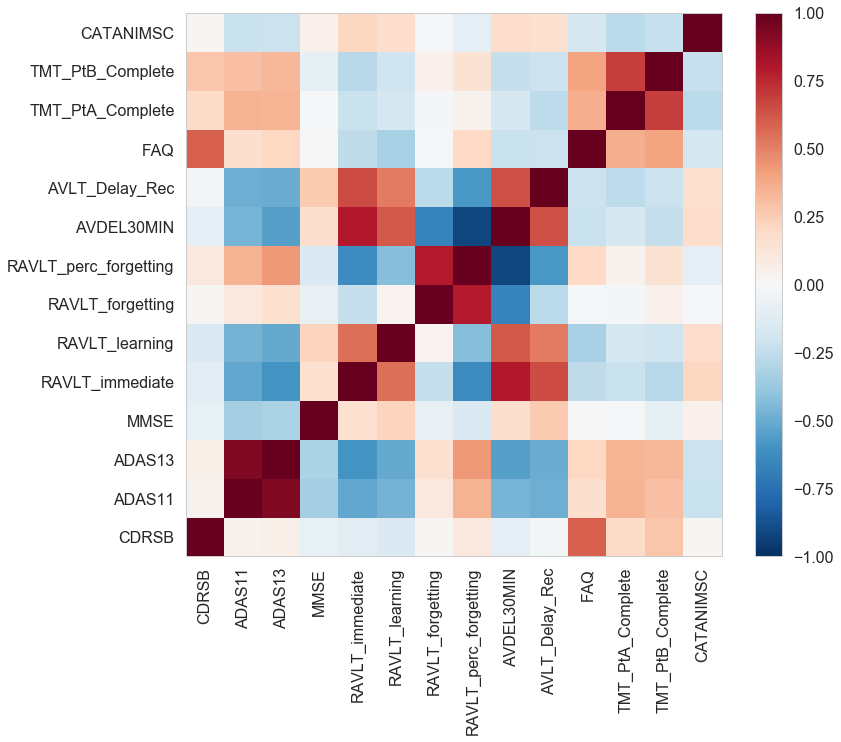

In [134]:
plt.figure(figsize=(12,10))
plt.pcolor(corr, cmap=dpal, vmin=-1, vmax=1)
plt.xticks(np.arange(data_neuro.shape[1])+0.5, list(data_neuro), rotation='vertical')
plt.yticks(np.arange(data_neuro.shape[1])+0.5, list(data_neuro),rotation='horizontal')
plt.colorbar();

#### Scatter plot matrix

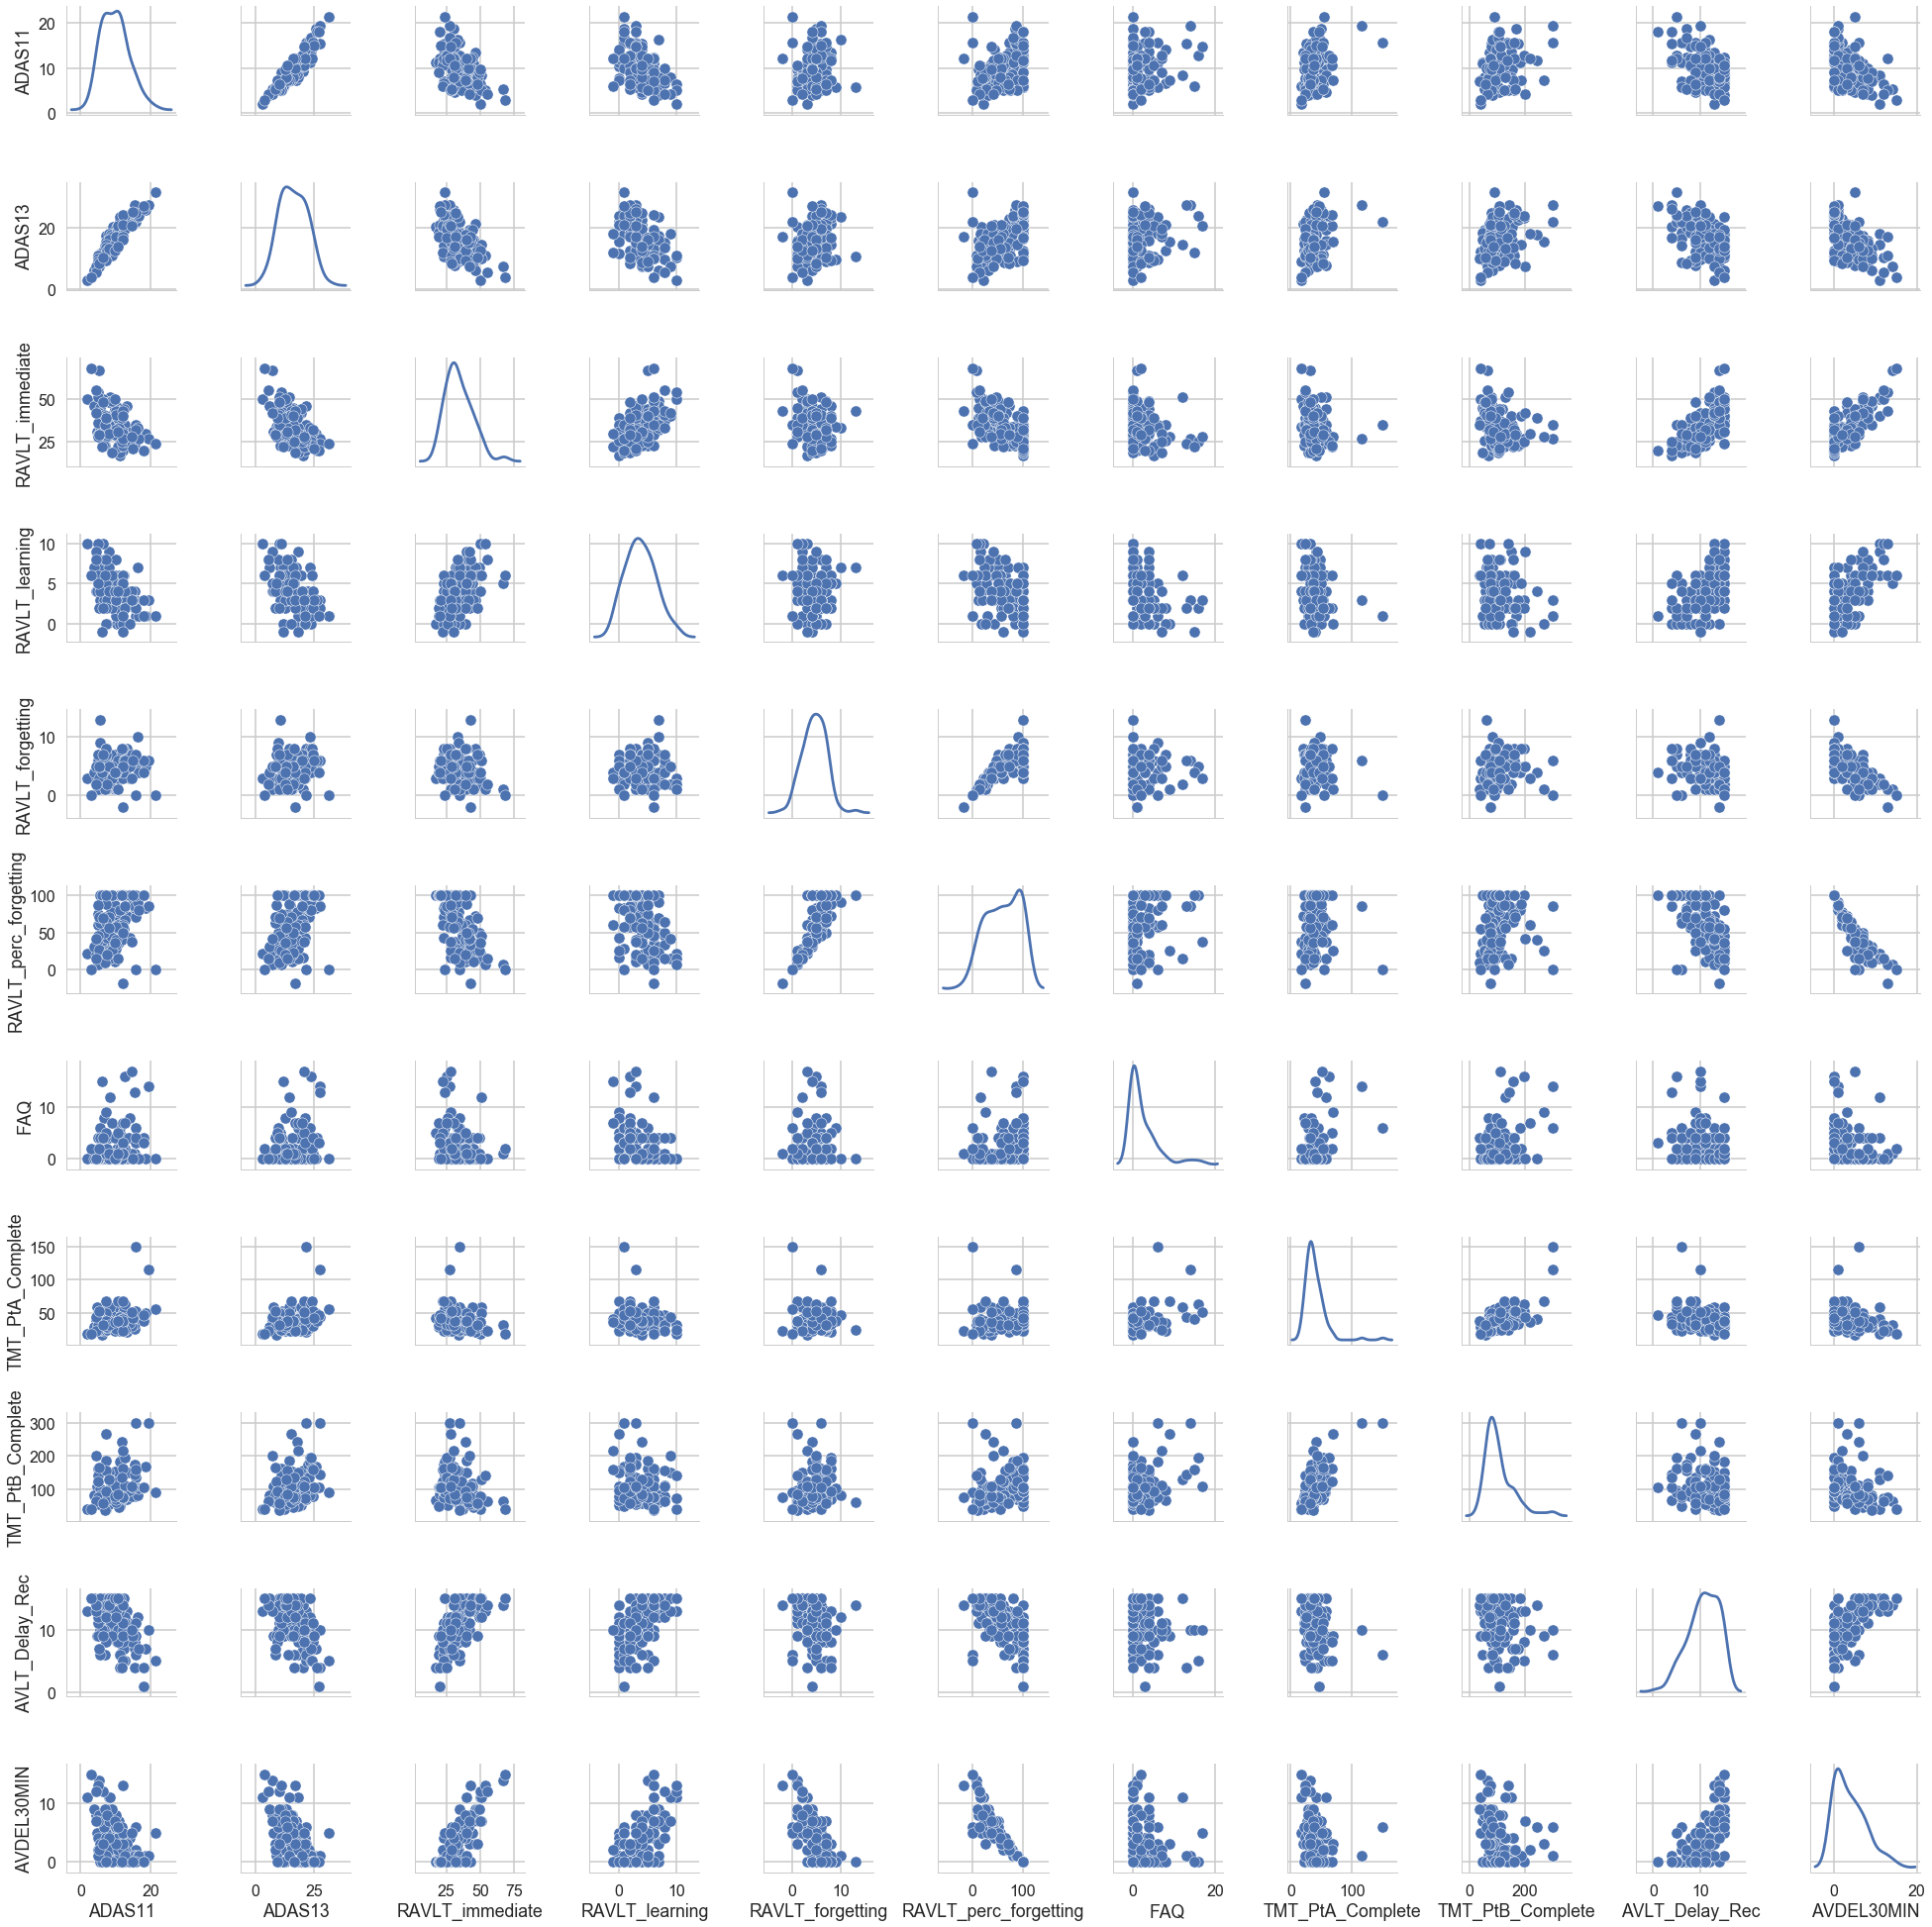

In [129]:
sns.pairplot(data_neuro[['ADAS11','ADAS13','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting',
                         'RAVLT_perc_forgetting','FAQ','TMT_PtA_Complete','TMT_PtB_Complete','AVLT_Delay_Rec',
                         'AVDEL30MIN']], diag_kind='kde');

- #### Interpretation
<br/>Neuropsychological measures in the same domain (e.g. Trail making Tests are in the attention/executive functioning domain; AVLT measures are in the memory domain), tend to be positively correlated. Correlations tend to be weaker and often in opposite directions for inter-domain comparisons.

#### Box plots and count plots

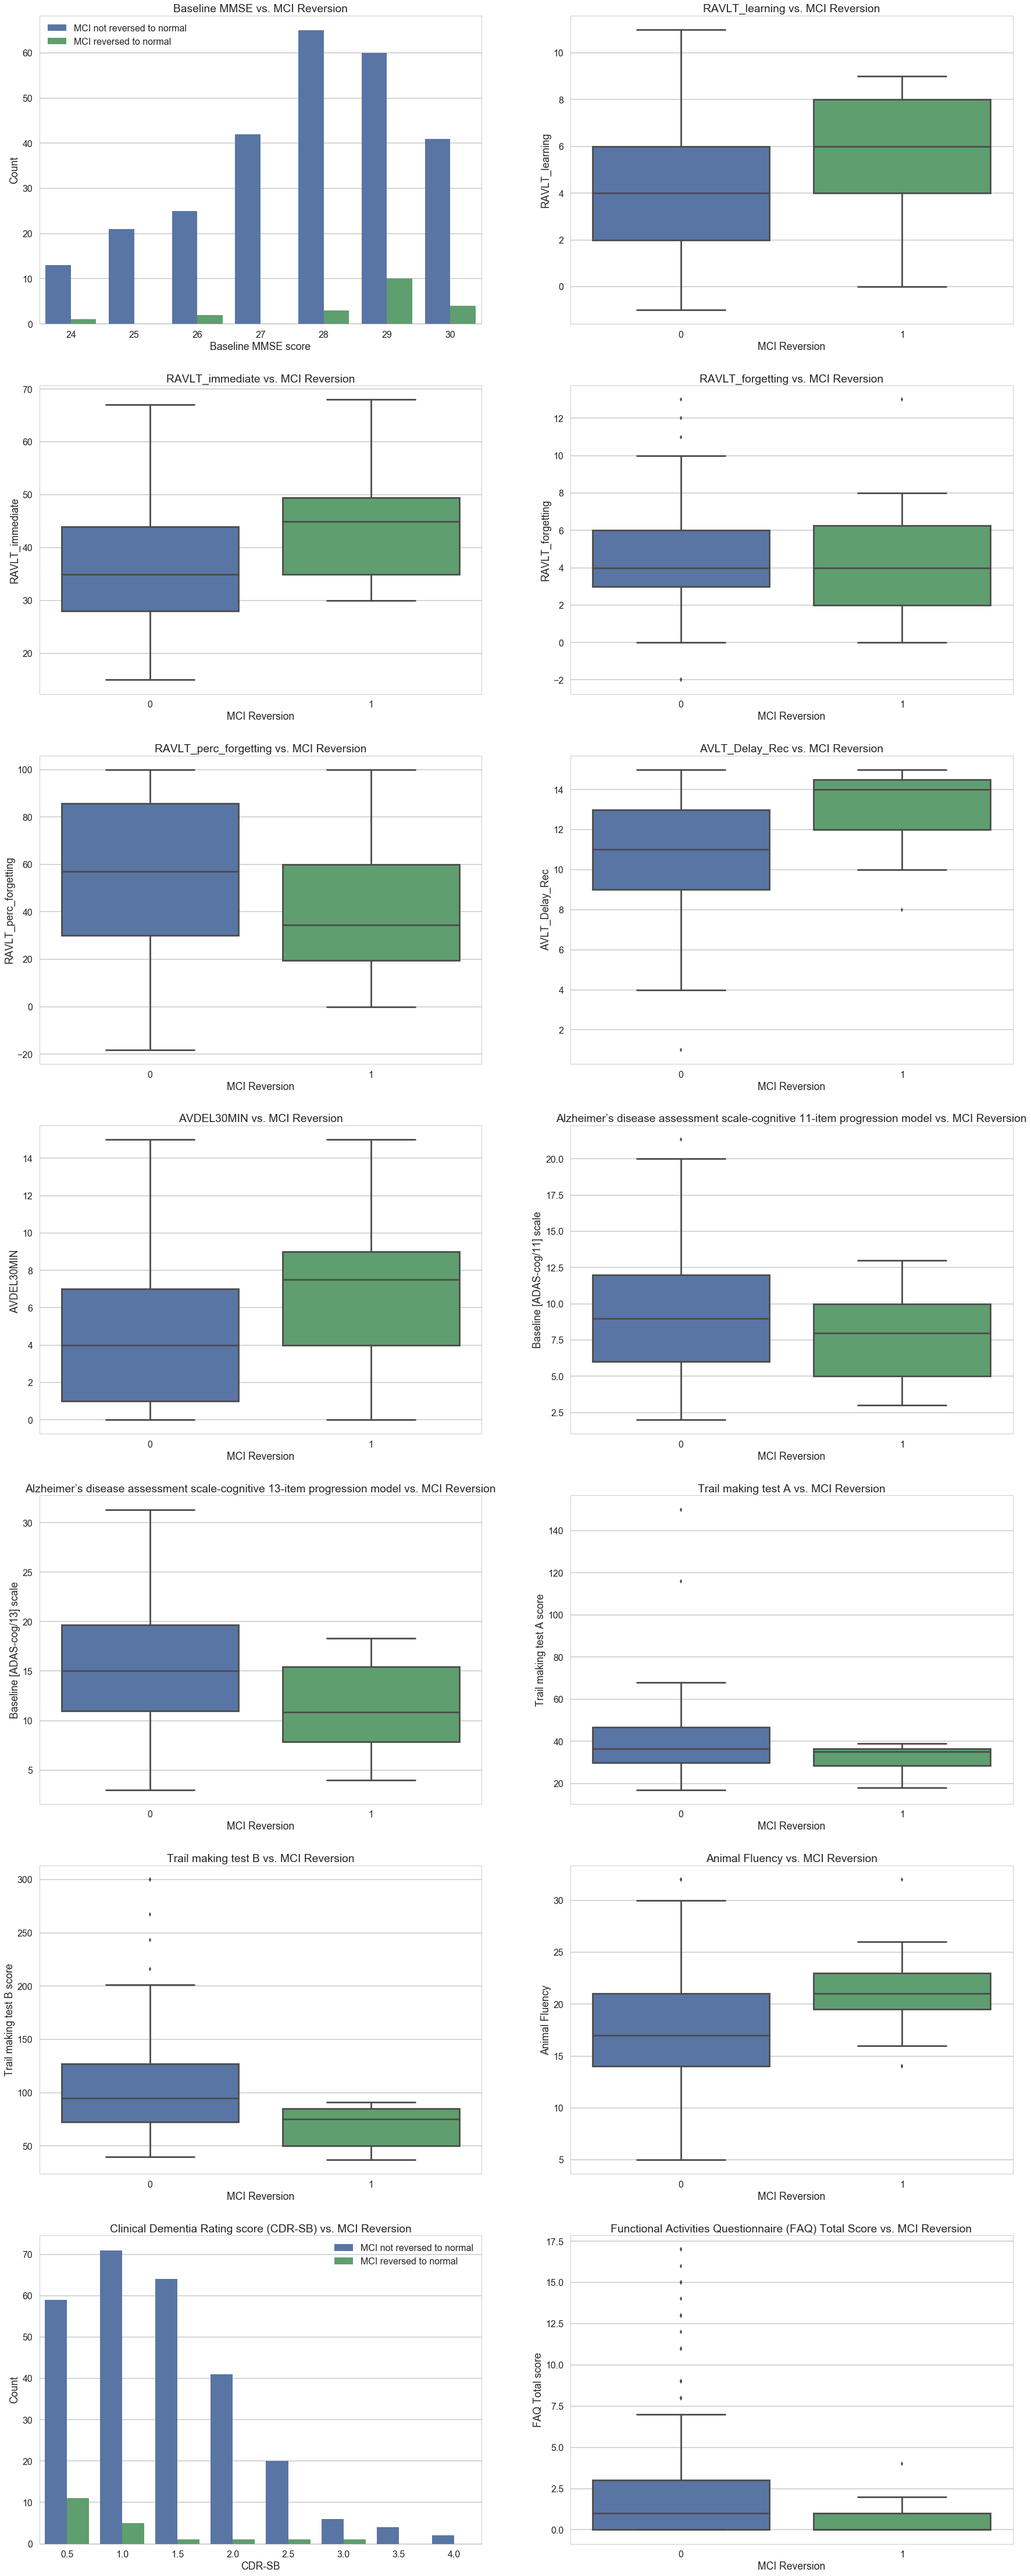

In [135]:
plt.figure(figsize=(30,80))

# Baseline Mini–Mental State Examination
plt.subplot(7,2,1)
data_mmse = data_train[['MMSE','MCI_reversion_2y']]
sns.countplot(x='MMSE', hue='MCI_reversion_2y', data=data_mmse)
plt.title('Baseline MMSE vs. MCI Reversion')
plt.xlabel('Baseline MMSE score')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper left')
    
# RAVLT_learning
plt.subplot(7,2,2)
data_RAVLT_learning = data_train[['RAVLT_learning','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='RAVLT_learning', data=data_RAVLT_learning)
plt.title('RAVLT_learning vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('RAVLT_learning')
    
# RAVLT_immediate
plt.subplot(7,2,3)
data_RAVLT_immediate = data_train[['RAVLT_immediate','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='RAVLT_immediate', data=data_RAVLT_immediate)
plt.title('RAVLT_immediate vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('RAVLT_immediate')

# RAVLT_forgetting
plt.subplot(7,2,4)
data_RAVLT_forgetting = data_train[['RAVLT_forgetting','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='RAVLT_forgetting', data=data_RAVLT_forgetting)
plt.title('RAVLT_forgetting vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('RAVLT_forgetting')
    
# RAVLT_perc_forgetting
plt.subplot(7,2,5)
data_RAVLT_perc_forgetting = data_train[['RAVLT_perc_forgetting','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='RAVLT_perc_forgetting', data=data_RAVLT_perc_forgetting)
plt.title('RAVLT_perc_forgetting vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('RAVLT_perc_forgetting')

# AVLT_Delay_Rec
plt.subplot(7,2,6)
data_AVLT_Delay_Rec = data_train[['AVLT_Delay_Rec','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='AVLT_Delay_Rec', data=data_AVLT_Delay_Rec)
plt.title('AVLT_Delay_Rec vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('AVLT_Delay_Rec')

# AVDEL30MIN
plt.subplot(7,2,7)
data_AVDEL30MIN = data_train[['AVDEL30MIN','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='AVDEL30MIN', data=data_AVDEL30MIN)
plt.title('AVDEL30MIN vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('AVDEL30MIN ') 

# Alzheimer’s disease assessment scale-cognitive 11-item progression model
plt.subplot(7,2,8)
data_ADAS11 = data_train[['ADAS11','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='ADAS11', data=data_ADAS11)
plt.title('Alzheimer’s disease assessment scale-cognitive 11-item progression model vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Baseline [ADAS-cog/11] scale')
    
# Alzheimer’s disease assessment scale-cognitive 13-item progression model
plt.subplot(7,2,9)
data_ADAS13 = data_train[['ADAS13','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='ADAS13', data=data_ADAS13)
plt.title('Alzheimer’s disease assessment scale-cognitive 13-item progression model vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Baseline [ADAS-cog/13] scale')
    
# Trail making test A
plt.subplot(7,2,10)
data_TMT_PtA_Complete = data_train[['TMT_PtA_Complete','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='TMT_PtA_Complete', data=data_TMT_PtA_Complete)
plt.title('Trail making test A vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Trail making test A score')
    
# Trail making test B
plt.subplot(7,2,11)
data_TMT_PtB_Complete = data_train[['TMT_PtB_Complete','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='TMT_PtB_Complete', data=data_TMT_PtB_Complete)
plt.title('Trail making test B vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Trail making test B score')
    
# Animal Fluency
plt.subplot(7,2,12)
data_CATANIMSC = data_train[['CATANIMSC','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='CATANIMSC', data=data_CATANIMSC)
plt.title('Animal Fluency vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Animal Fluency')

# Clinical Dementia Rating score
plt.subplot(7,2,13)
data_CDRSB = data_train[['CDRSB','MCI_reversion_2y']]
sns.countplot(x='CDRSB', hue='MCI_reversion_2y', data=data_CDRSB)
plt.title('Clinical Dementia Rating score (CDR-SB) vs. MCI Reversion')
plt.xlabel('CDR-SB')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right')

# Functional Activities Questionnaire
plt.subplot(7,2,14)
data_FAQ = data_train[['FAQ','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='FAQ', data=data_FAQ)
plt.title('Functional Activities Questionnaire (FAQ) Total Score vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('FAQ Total score');

- #### Interpretation
    - **MMSE:** There is no apparent trend between baseline MMSE score and MCI reversion. 
    - **Auditory Verbal Learning Test (AVLT) scores:** All the AVLT scores seem to be associated with MCI reversion. RAVLT_forgetting, RAVLT_perc_forgetting, and AVDEL30MIN are strongly correlated. We select RAVLT_immediate, RAVLT_learning, RAVLT_perc_forgetting, and AVLT_Delay_Rec as our potential predictors. Lower scores for AVLT suggests poorer memory abilities.
    - **ADAS11 and ADAS13:** These two predictors are strongly correlated and both seem to be associated with MCI reversion (negative correlation). We select ADAS13 as our potential predictor.
    - **Trail making test A and Trail making test B:** These two variables are strongly correlated and both seem to assoicated with MCI reversion. We select Trail making test B as our potential predictor. Higher scores for the trail making tests (TNT A and B), indicate poorer attention/executive function.
    - **Animal Fluency:** Based on the boxplot, people with high Animal Fluency are more likely to reverse from MCI. We select Animal Fluency as our potential predictor. Lower scores for Animal Fluency represent poorer language skills.
    - **Clinical Dementia Rating score (CDR-SB):** There is no apparent trend between CDR-SB and MCI reversion. Higher CDR-SB scores indicates poorer cogntive/functional performance.
    - **Functional Activities Questionnaire (FAQ) Total Score:** Based on the boxplot, people with low FAQ are more likely to reverse from MCI. Higher FAQ represent poorer functioning.

- #### Variable Selection
    - We select **RAVLT_immediate**, **RAVLT_learning**, **RAVLT_perc_forgetting**, **AVLT_Delay_Rec**, **ADAS13**, **TMT_PtB_Complete**, **Animal Fluency**, **FAQ** as potential predictors.

### e. Neuroimaging Biomarkers

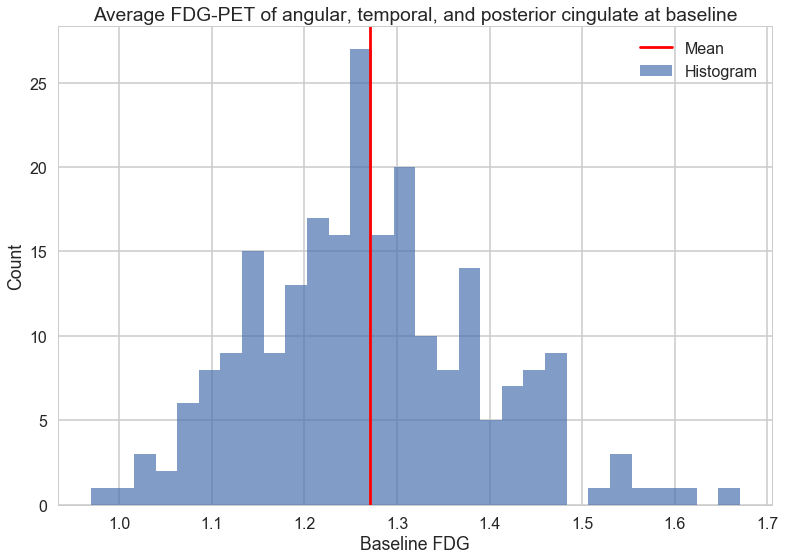

In [138]:
plt.hist(x=data_train['FDG'].dropna(),alpha=0.7,bins=30,label='Histogram');
plt.title('Average FDG-PET of angular, temporal, and posterior cingulate at baseline')
plt.xlabel('Baseline FDG')
plt.ylabel('Count')
plt.axvline(data_train['FDG'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend();

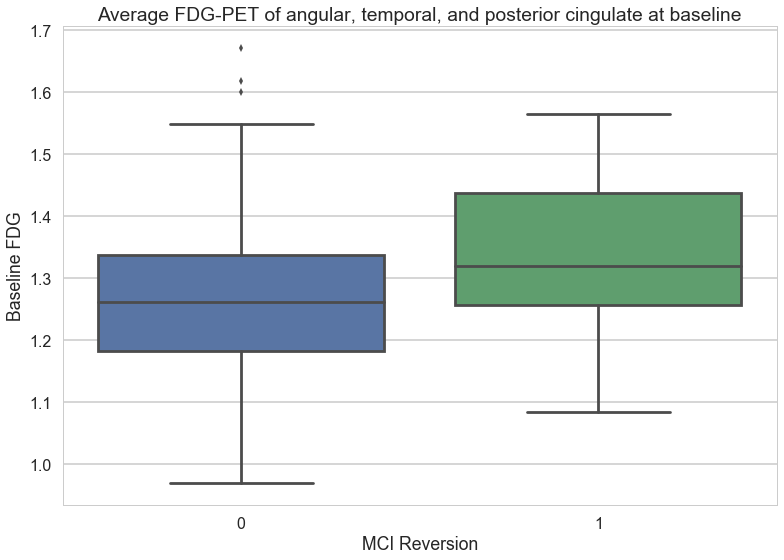

In [140]:
data_fdg = data_train[['FDG','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='FDG', data=data_fdg)
plt.title('Average FDG-PET of angular, temporal, and posterior cingulate at baseline')
plt.xlabel('MCI Reversion')
plt.ylabel('Baseline FDG');

- #### Interpretation
<br/>Based on the boxplot, people with higher fluorodeoxyglucose 18F uptake on brain positron emission tomography (FDG-PET)  are more likely to reverse from MCI. We select FDG-PET as our potential predictor.

- #### Variable Selection
    - We select **FDG-PET** as potential predictor.

### f. Cerebrospinal fluid (CSF) Biomarkers

#### Histogram

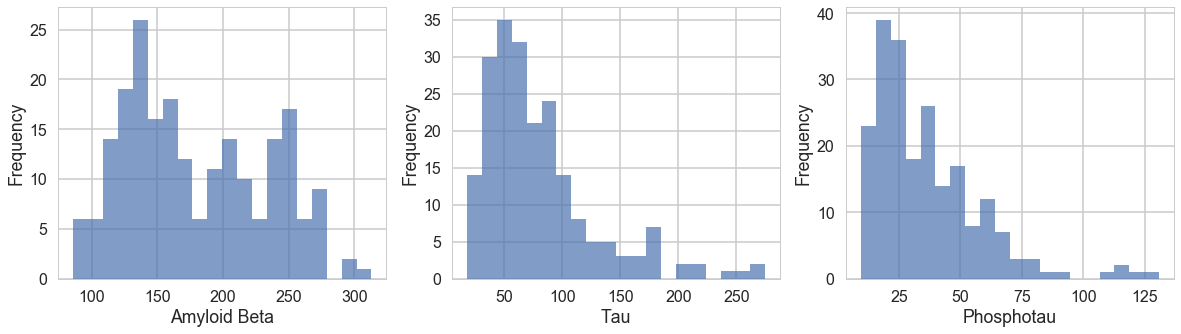

In [141]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(x=data_train['ABETA'].dropna(),alpha=0.7,bins=20,label='Histogram')
ax[1].hist(x=data_train['TAU'].dropna(),alpha=0.7,bins=20,label='Histogram')
ax[2].hist(x=data_train['PTAU'].dropna(),alpha=0.7,bins=20,label='Histogram')
ax[0].set_xlabel("Amyloid Beta")
ax[1].set_xlabel("Tau")
ax[2].set_xlabel("Phosphotau")
ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")
ax[2].set_ylabel("Frequency");

#### Correlation matrix

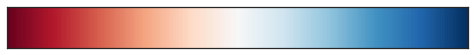

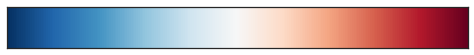

In [142]:
# Correlations between biomarkers
biomkr = data_train[['ABETA','TAU','PTAU']].dropna()
corr = pd.DataFrame(np.corrcoef(biomkr.T)) # on transposed training matrix
corr.columns = ['ABETA','TAU','PTAU']
dpal = sns.choose_colorbrewer_palette(data_type='diverging', as_cmap=True)

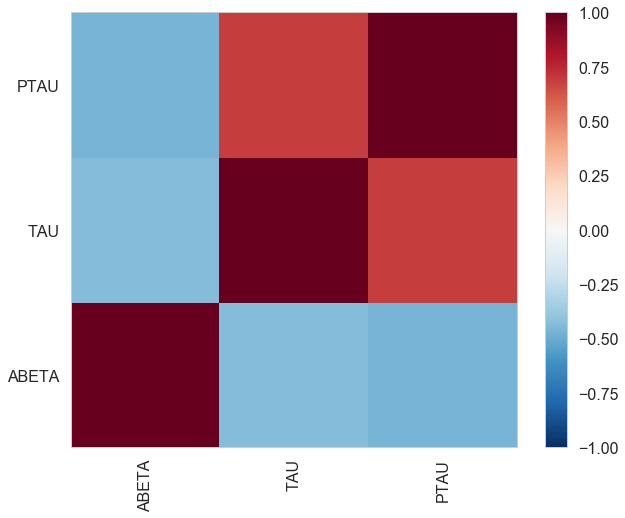

In [143]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.pcolor(corr, cmap=dpal, vmin=-1, vmax=1)
plt.xticks(np.arange(biomkr.shape[1])+0.5, list(biomkr), rotation='vertical')
plt.yticks(np.arange(biomkr.shape[1])+0.5, list(biomkr),rotation='horizontal')
plt.colorbar();

- #### Interpretation
<br/>There appears to be a bimodal distribution for amyloid beta, while the tau and phosph-tau levels are right skewed. There is high positive correlation between CSF concentrations tau and phosphoryated-tau, which is unsurprising given that high concentrations of both are indicative of synaptic dysfunction and/or early neurodegeneration. Amyloid-beta concentrations, on the other hand, is negatively correlated with the other two biomarkers, which is consistent with the literature, since low concentrations of amyloid-beta suggest presence of cerebral amyloid accumulation.

#### Box plot

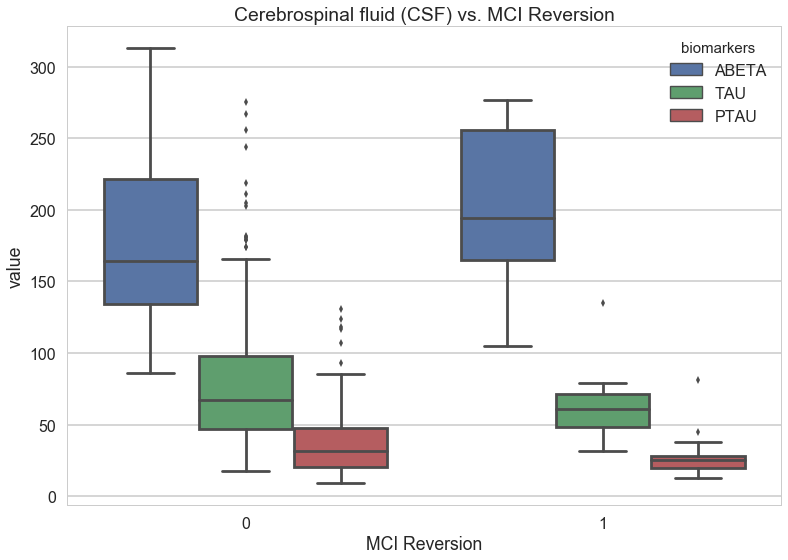

In [145]:
dd = pd.melt(data_train,id_vars=['MCI_reversion_2y'],value_vars=['ABETA','TAU','PTAU'],var_name='biomarkers')
sns.boxplot(x='MCI_reversion_2y',y='value',data=dd,hue='biomarkers')
plt.xlabel('MCI Reversion')
plt.title('Cerebrospinal fluid (CSF) vs. MCI Reversion');

- #### Interpretation
    - **Beta-amyloid levels at baseline (ABETA):** Based on the boxplot, people with high ABETA are more likely to reverse from MCI. We select ABETA as our potential predictor.
    - **CSF concentrations tau and phosphoryated-tau:** These two predictors are strongly correlated and both seem to be associated with MCI reversion. We selecr TAU as our potential predictor.

- #### Variable Selection
    - We select **ABETA** and **TAU** as potential predictors.

### g. Genetic factors

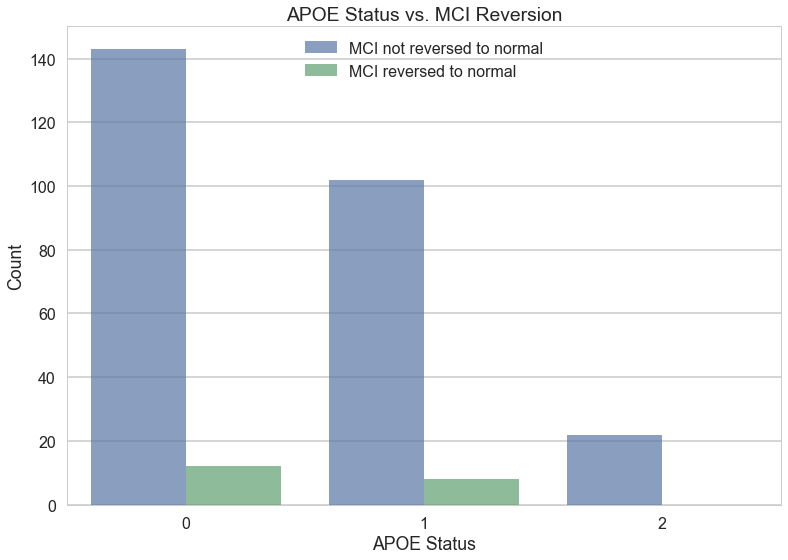

In [147]:
# APOE status vs. MCI Reversion
data_apoe = data_train[['APOE4','MCI_reversion_2y']]
sns.countplot(x='APOE4', hue='MCI_reversion_2y', data=data_apoe,alpha=0.7)
plt.title('APOE Status vs. MCI Reversion')
plt.xlabel('APOE Status')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal']);

- #### Interpretation
    - **APOE Status:** The APOE status seems to be associated with MCI reversion, but the association is not very clear based on this plot. We select APOE status as potential predictor.

- #### Variable Selection
    - We select **APOE Status** as potential predictor.

## 3. Summary

Based on the EDA above, we select the following variables as potential predictors for modeling: **Demographic characteristics:** Age, Gender, Education, and Marital Status; **Clinical factors:** Homocysteine level and BMI; **Lifestyle factors:**  Baseline smoking; **Neurocognitive/neuropsychological assessments:** RAVLT_immediate, RAVLT_learning, RAVLT_perc_forgetting, AVLT_Delay_Rec, ADAS13, TMT_PtB_Complete, Animal Fluency, and FAQ; **Neuroimaging Biomarkers:** FDG-PET; **Cerebrospinal fluid (CSF) Biomarkers:** ABETA and TAU; **Genetic factors:** APOE Status.